In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.constants.events import SCL5_DIVISIONS, select_scl5, SCL5_DROPPED_PLAYERS
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.outcomes import WinType
from triple_agent.reports.specific.game_durations import game_durations
from triple_agent.reports.specific.scl_set_scores import game_differential
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins, sort_by_sniper_wins

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

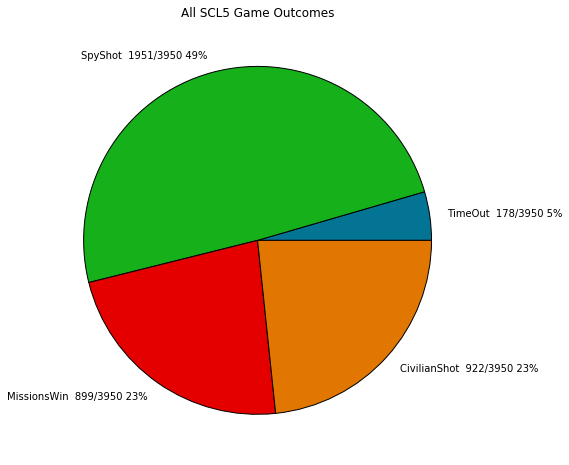

In [5]:
game_outcomes(
    scl5_replays,
    axis_properties=AxisProperties(title="All SCL5 Game Outcomes")
)

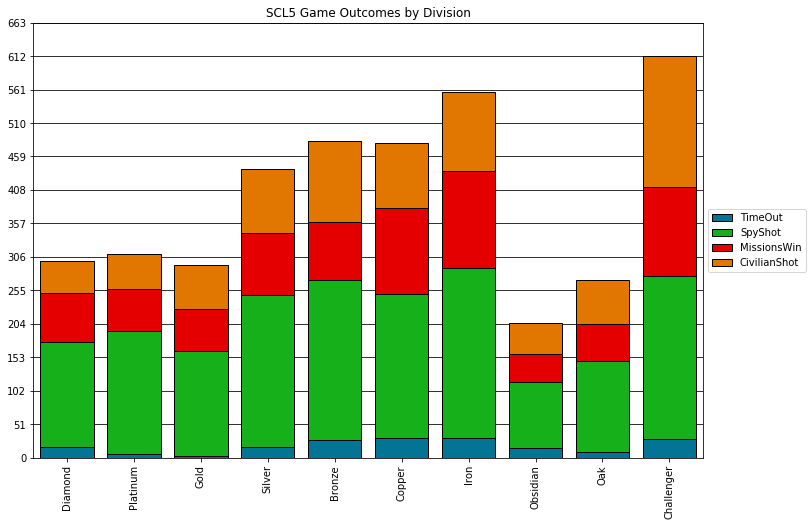

In [6]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(groupby=lambda g: g.division,category_name_order=lambda g: SCL5_DIVISIONS.index(g)),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Division")
)

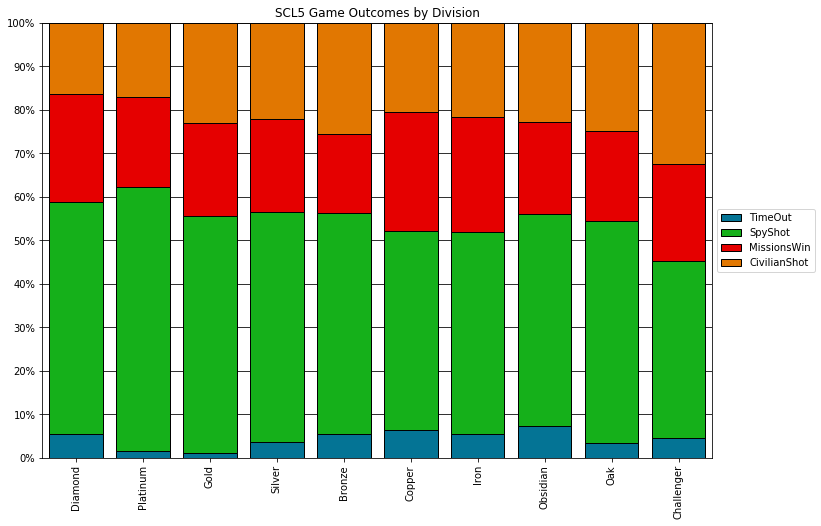

In [7]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(groupby=lambda g: g.division,category_name_order=lambda g: SCL5_DIVISIONS.index(g), percent_normalized_data=True),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Division")
)

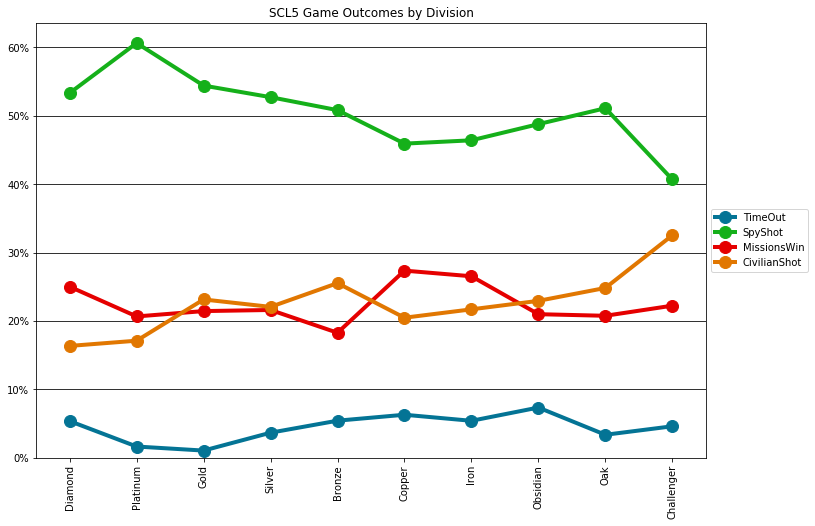

In [8]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(groupby=lambda g: g.division,category_name_order=lambda g: SCL5_DIVISIONS.index(g), percent_normalized_data=True),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Division", force_line=True)
)

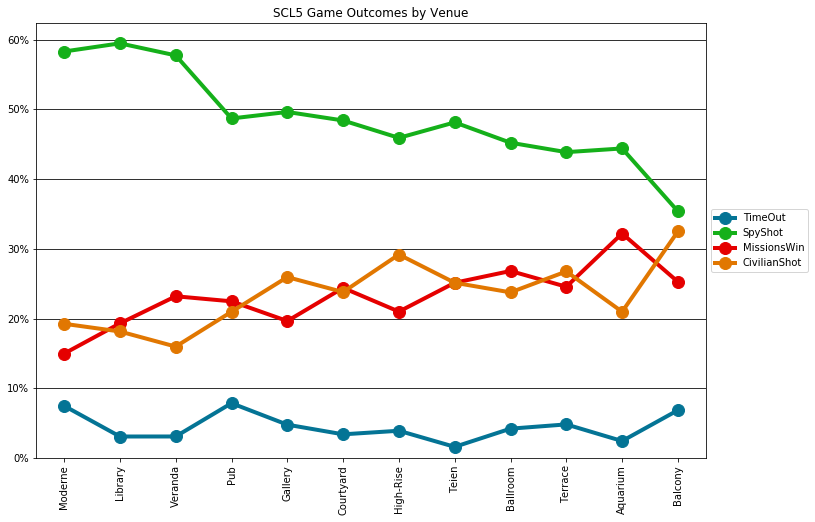

In [9]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(groupby=lambda g: g.venue,category_data_order=sort_by_spy_wins, percent_normalized_data=True),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Venue",savefig='example_pictures/scl5_venue_outcomes_line.png',force_line=True)
)

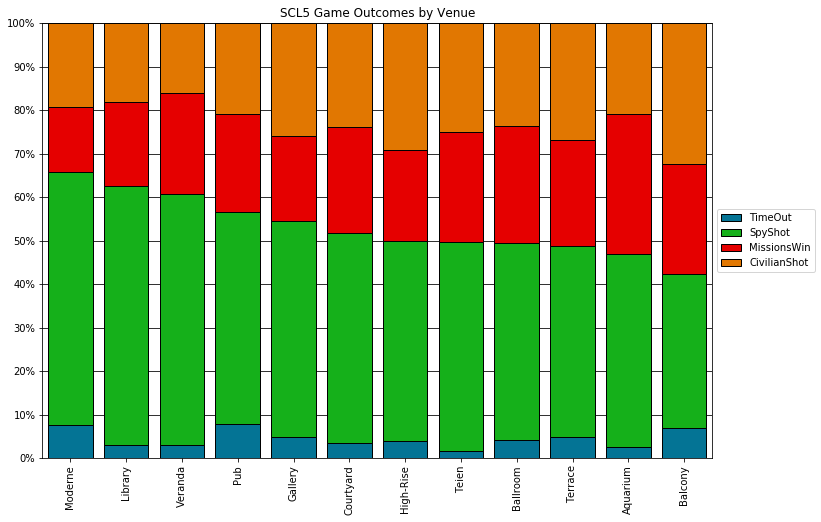

In [10]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(groupby=lambda g: g.venue,category_data_order=sort_by_spy_wins, percent_normalized_data=True),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Venue",savefig='example_pictures/scl5_venue_outcomes_stacked.png')
)

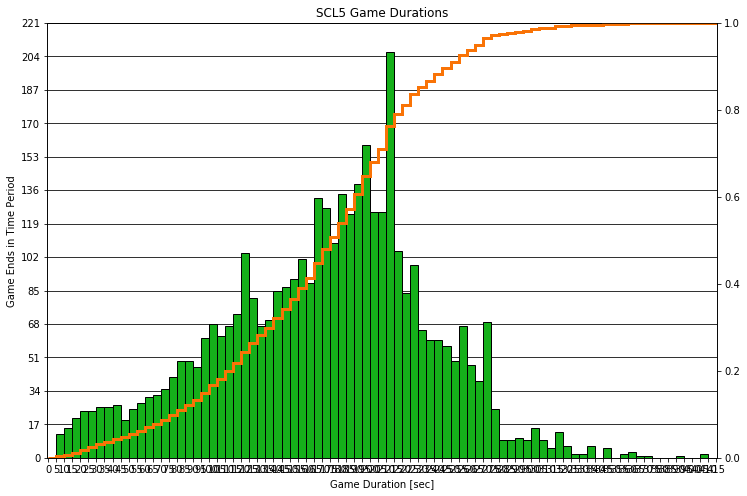

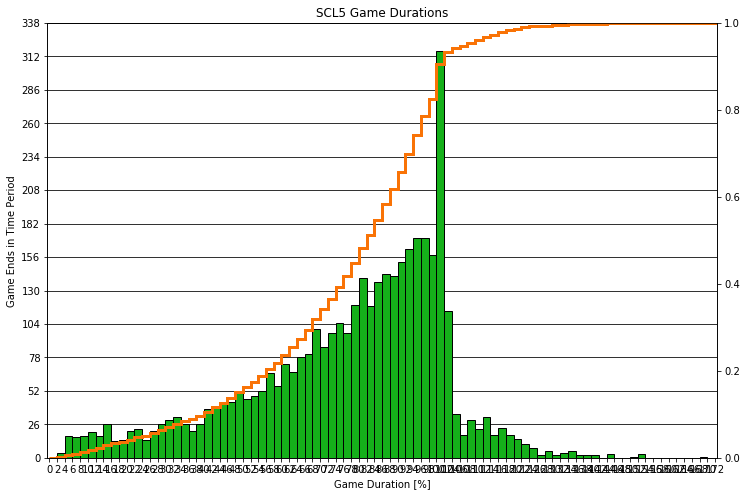

In [11]:
game_durations(scl5_replays, "SCL5 Game Durations")

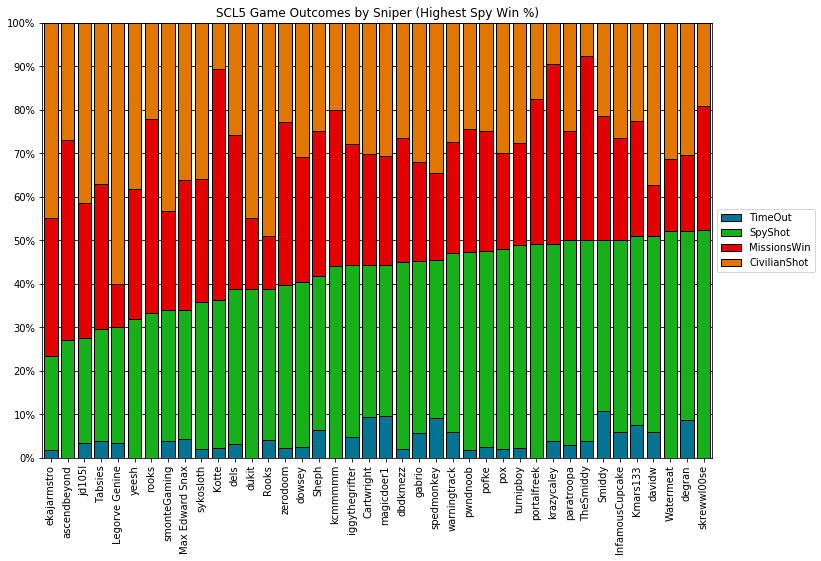

In [12]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        category_data_order=sort_by_spy_wins,
        reversed_data_sort=True,
        data_stack_order = [WinType.SpyShot, WinType.TimeOut, WinType.MissionsWin, WinType.CivilianShot],
        limit=40,
        percent_normalized_data=True),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Sniper (Highest Spy Win %)")
)

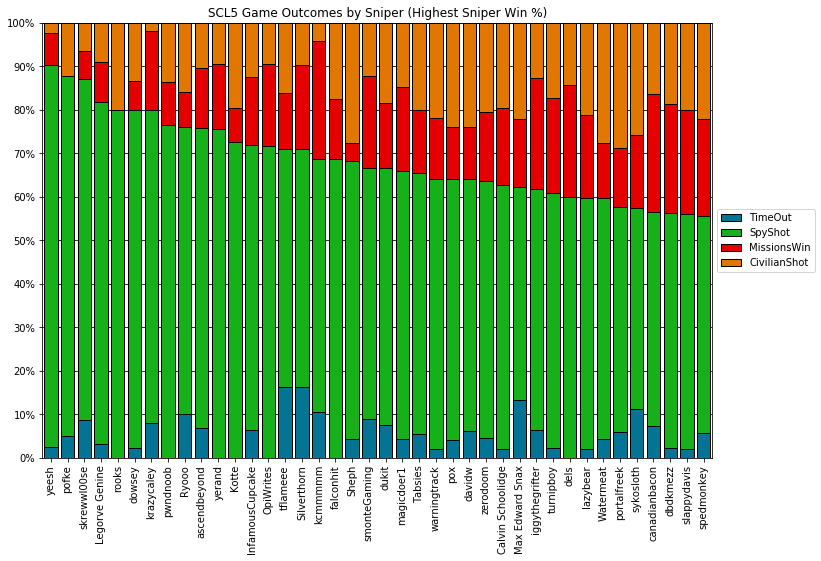

In [13]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.sniper,
        reversed_data_sort=True,
        category_data_order=sort_by_sniper_wins,
        data_stack_order = [WinType.SpyShot, WinType.TimeOut, WinType.MissionsWin, WinType.CivilianShot],
        limit=40,
        percent_normalized_data=True),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Sniper (Highest Sniper Win %)")
)